Customer Behavior Segmentation for Retail Optimization
You are working as a Data Scientist in an e-commerce company.
The company has collected detailed customer behavior data, including:
Annual Income
Spending Score
Purchase Frequency
Average Basket Value
Website Visit Time
Discount Usage Rate
Product Category Preferences
Return Rate
The dataset contains multiple numerical features, making it difficult to:
Visualize customer groups
Train clustering models efficiently
Understand key behavioral patterns
Dataset Name:

Customer Personality Analysis
🔗 https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
Customer Personality Analysis | Kaggle
Analysis of company's ideal customers
 
🔹 Part 1 – Data Preparation
Load the dataset.
Select only numerical features relevant to customer behavior.
Handle missing values.
Standardize the data.
🔹 Part 2 – PCA Implementation
Apply PCA on the standardized dataset.
Plot the explained variance ratio.
Determine:
How many principal components are needed to retain at least 90% of total variance?
Reduce the dataset to those components.
🔹 Part 3 – Interpretation
Identify:
Which original features contribute most to PC1?
Which features dominate PC2?
Explain what PC1 and PC2 represent in business terms.
🔹 Part 4 – Practical Application
Visualize customers in 2D PCA space.
Now apply K-Means clustering on:
Original dataset
PCA-reduced dataset
Compare:
Silhouette score
Computation time
Cluster separation quality
 

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("marketing_campaign.csv", sep="\t")
print(df.head())
print(df.shape)


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [2]:
# Remove spaces from column names
df.columns = df.columns.str.strip()

# Convert Income to numeric
df["Income"] = pd.to_numeric(df["Income"], errors="coerce")

# Fill missing income with median
df["Income"] = df["Income"].fillna(df["Income"].median())

print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [3]:
behavior_features = [
    "Income", "Recency",
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds",
    "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth",
    "Kidhome", "Teenhome",
    "Complain", "Response"
]

df_num = df[behavior_features]
print(df_num.head())


    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  58138.0       58       635         88              546              172   
1  46344.0       38        11          1                6                2   
2  71613.0       26       426         49              127              111   
3  26646.0       26        11          4               20               10   
4  58293.0       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Kidhome  \
0                  

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)


Part 2 – PCA Implementation

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


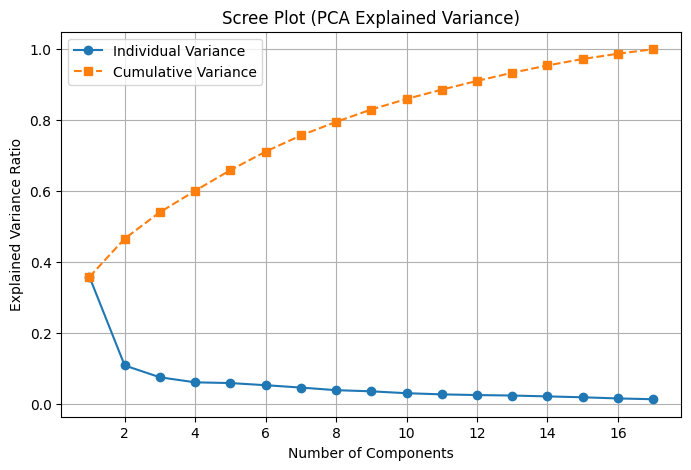

In [6]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_,
         marker="o", label="Individual Variance")

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         np.cumsum(pca.explained_variance_ratio_),
         marker="s", linestyle="--", label="Cumulative Variance")

plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot (PCA Explained Variance)")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
print("Components needed for 90% variance:", n_components_90)


Components needed for 90% variance: 12


In [8]:
pca_90 = PCA(n_components=n_components_90)
X_reduced = pca_90.fit_transform(X_scaled)

print("Reduced Dataset Shape:", X_reduced.shape)


Reduced Dataset Shape: (2240, 12)


Part 3 – Interpretation (PC1 & PC2 Contributions)

In [9]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=df_num.columns
)

print("Top contributors for PC1:")
print(loadings["PC1"].sort_values(ascending=False).head(10))

print("\nTop contributors for PC2:")
print(loadings["PC2"].sort_values(ascending=False).head(10))


Top contributors for PC1:
NumCatalogPurchases    0.331412
MntMeatProducts        0.325034
MntWines               0.305110
Income                 0.300449
NumStorePurchases      0.299702
MntFishProducts        0.295920
MntFruits              0.286949
MntSweetProducts       0.285644
MntGoldProds           0.235463
NumWebPurchases        0.221685
Name: PC1, dtype: float64

Top contributors for PC2:
NumDealsPurchases      0.565057
Teenhome               0.510771
NumWebPurchases        0.423449
NumWebVisitsMonth      0.279381
MntWines               0.203358
NumStorePurchases      0.197985
MntGoldProds           0.149408
Income                 0.040865
NumCatalogPurchases    0.018092
Response               0.003799
Name: PC2, dtype: float64


Part 4 – Practical Application

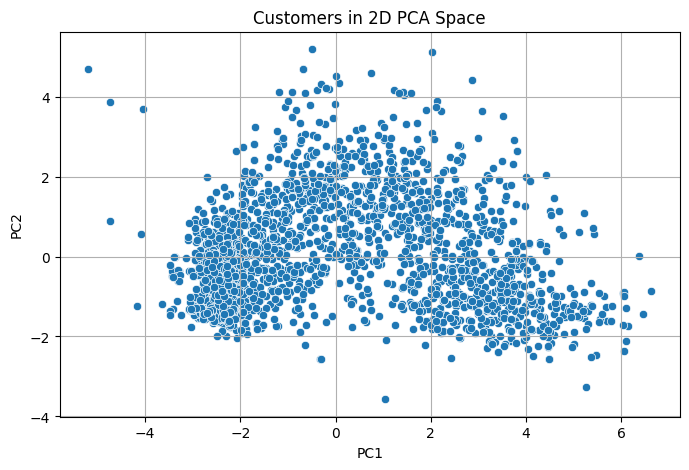

In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1])
plt.title("Customers in 2D PCA Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import time

k = 4  # you can try 3,4,5

start = time.time()
kmeans_original = KMeans(n_clusters=k, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)
time_original = time.time() - start

sil_original = silhouette_score(X_scaled, labels_original)

print("Original Data Silhouette Score:", sil_original)
print("Original Data Computation Time:", time_original)


Original Data Silhouette Score: 0.20574089379601232
Original Data Computation Time: 3.1471943855285645


In [12]:
start = time.time()
kmeans_pca = KMeans(n_clusters=k, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_reduced)
time_pca = time.time() - start

sil_pca = silhouette_score(X_reduced, labels_pca)

print("PCA Reduced Silhouette Score:", sil_pca)
print("PCA Reduced Computation Time:", time_pca)


PCA Reduced Silhouette Score: 0.22799279867676173
PCA Reduced Computation Time: 0.029466629028320312


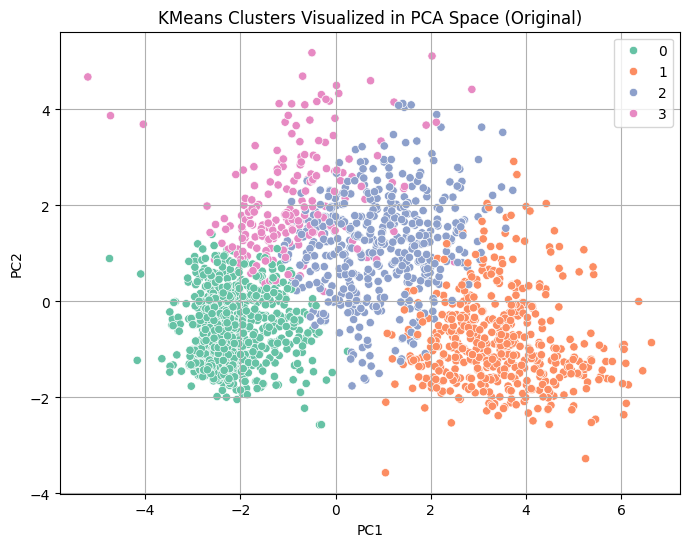

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=labels_original, palette="Set2")
plt.title("KMeans Clusters Visualized in PCA Space (Original)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [14]:
results = pd.DataFrame({
    "Dataset": ["Original", "PCA Reduced"],
    "Silhouette Score": [sil_original, sil_pca],
    "Computation Time (sec)": [time_original, time_pca]
})

print(results)


       Dataset  Silhouette Score  Computation Time (sec)
0     Original          0.205741                3.147194
1  PCA Reduced          0.227993                0.029467
